In [2]:
## importing liabraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# extract and load the dataset 

In [16]:
data=pd.read_csv(r'https://raw.githubusercontent.com/vivek2319/K-Nearest-Neighbors/master/Datasets/Classified%20Data?_sm_au_=iVVVRjJ60ZKPntfFL321jK0f1JH33')

In [17]:
## copy dataset
df=data.copy()

In [18]:
## top 5 rows of datase
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [19]:
## bottom 5 rows of dataset
df.tail()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
995,995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1
999,999,0.837460,0.961184,0.417006,0.799784,0.934399,0.424762,0.778234,0.907962,1.257190,1.364837,1


In [20]:
## drop first coloumn of dataset which is not usefull
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [21]:
df.head(2)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0


In [22]:
## shape of dataset
df.shape

(1000, 11)

In [23]:
print("Total rows in dataset is - ",df.shape[0])
print("Total column in dataset is - ",df.shape[1])

Total rows in dataset is -  1000
Total column in dataset is -  11


In [24]:
df.index

RangeIndex(start=0, stop=1000, step=1)

In [25]:
## information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [26]:
## any null values in dataset
df.isna().sum()

WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64

In [27]:
## columns in dataset
df.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

In [28]:
## statistic details of dataset
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [30]:
## correlation of varibales in dataset
corr=df.corr()
corr

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
WTT,1.000000,-0.235255,-0.301018,-0.101517,-0.083401,-0.183628,-0.148100,-0.330977,0.324981,-0.073889,0.551394
PTI,-0.235255,1.000000,0.271908,0.001580,0.097322,0.173701,0.095060,0.246387,-0.266242,0.035834,-0.468748
EQW,-0.301018,0.271908,1.000000,-0.040291,0.144539,0.182021,0.059533,0.323857,-0.324656,0.126143,-0.598120
SBI,-0.101517,0.001580,-0.040291,1.000000,-0.007983,0.022026,-0.007666,0.037767,0.078032,0.145045,0.028874
LQE,-0.083401,0.097322,0.144539,-0.007983,1.000000,0.049944,0.035750,0.083734,-0.143929,0.044496,-0.205043
QWG,-0.183628,0.173701,0.182021,0.022026,0.049944,1.000000,0.098062,0.199189,-0.181809,0.036078,-0.327664
FDJ,-0.148100,0.095060,0.059533,-0.007666,0.035750,0.098062,1.000000,0.122888,-0.116969,-0.012923,-0.214885
PJF,-0.330977,0.246387,0.323857,0.037767,0.083734,0.199189,0.122888,1.000000,-0.363736,0.028012,-0.571483
HQE,0.324981,-0.266242,-0.324656,0.078032,-0.143929,-0.181809,-0.116969,-0.363736,1.000000,-0.129283,0.643989
NXJ,-0.073889,0.035834,0.126143,0.145045,0.044496,0.036078,-0.012923,0.028012,-0.129283,1.000000,-0.111730


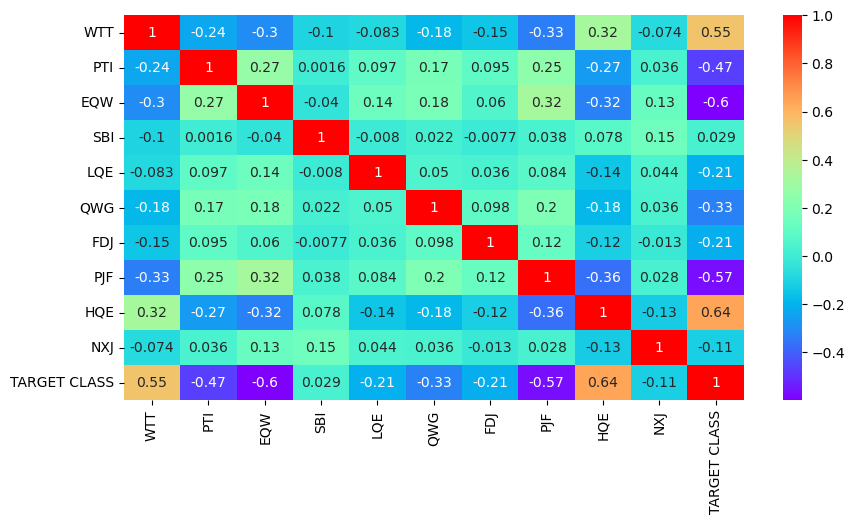

In [34]:
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True,cmap='rainbow')
plt.show()

In [35]:
## number of unique values in dataset
df.nunique()

WTT             1000
PTI             1000
EQW             1000
SBI             1000
LQE             1000
QWG             1000
FDJ             1000
PJF             1000
HQE             1000
NXJ             1000
TARGET CLASS       2
dtype: int64

In [38]:
## unique values in target class
df['TARGET CLASS'].unique()

array([1, 0], dtype=int64)

# distribution of dataset

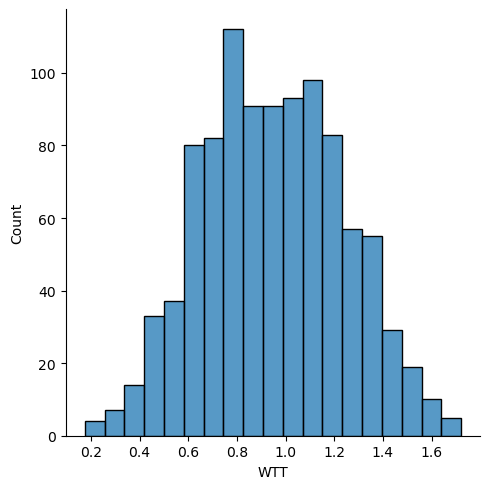

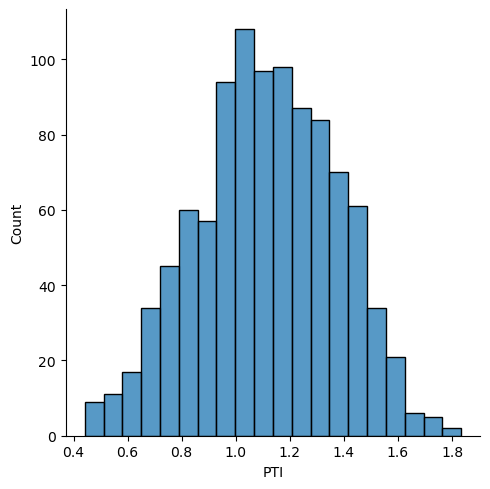

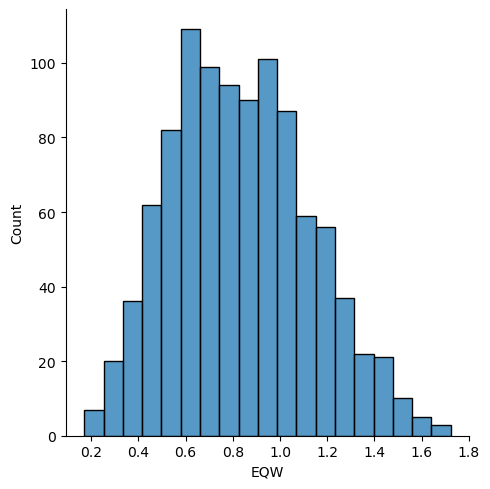

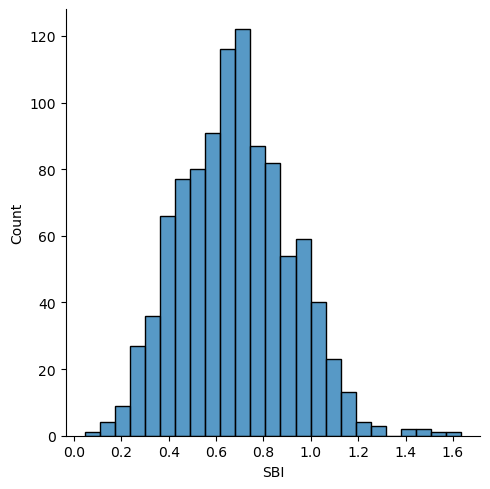

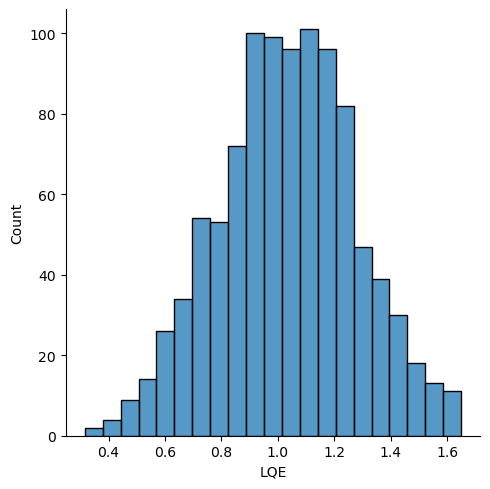

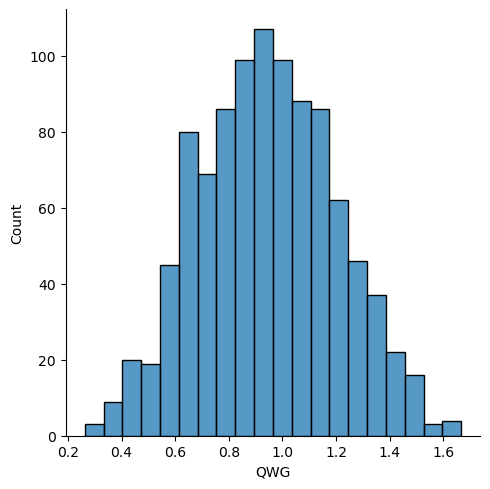

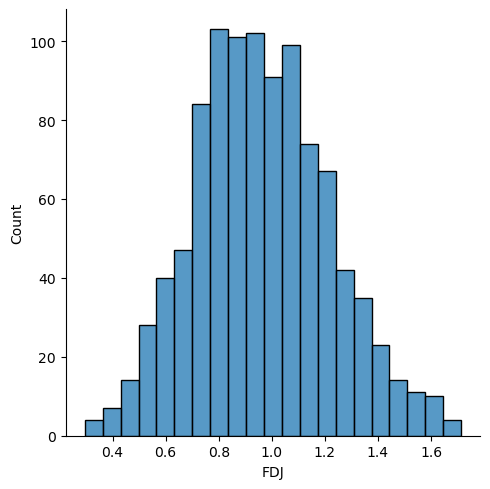

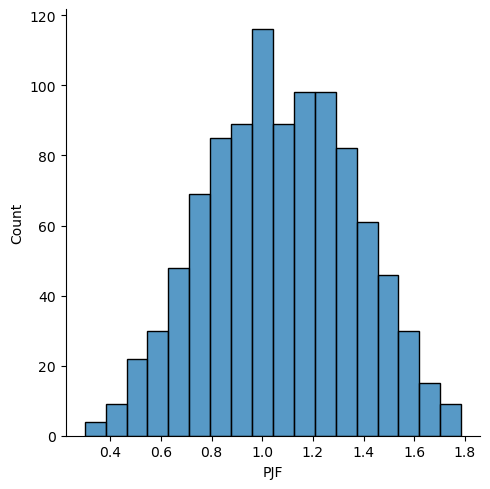

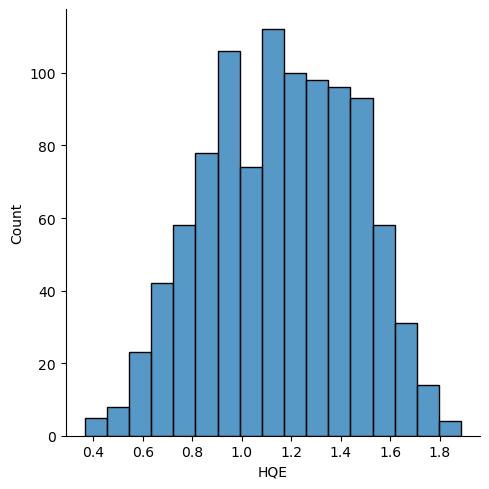

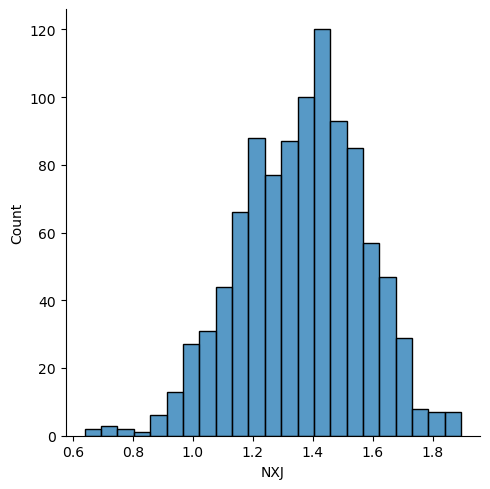

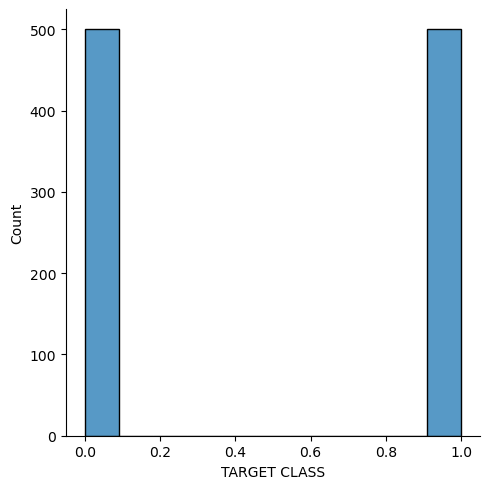

In [40]:
col=df.columns
for i in col:
    sns.displot(x=df[i])

# we will jump into machine learning model directly as focus is on model building only. So we skip EDA.

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from math import sqrt

## feature engineering

In [46]:
## split the data into train and test dataset
x=df[['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ']]
y=df['TARGET CLASS']

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=2020)

In [49]:
## shape of split data
x_train.shape,y_train.shape

((800, 10), (800,))

In [50]:
x_test.shape,y_test.shape

((200, 10), (200,))

## value of k by using standard 

In [52]:
k=sqrt(df.shape[0])
k

31.622776601683793

## value of k by error method

In [54]:
error=[]
for i in range(1,50):
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train,y_train)
    pred_i=clf.predict(x_test)
    error.append(1-accuracy_score(y_test,pred_i))

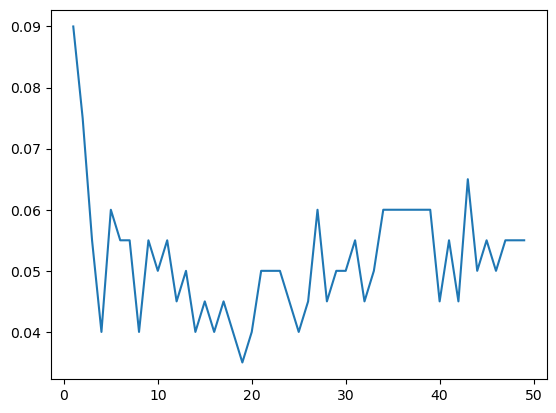

In [56]:
plt.plot(range(1,50),error)
plt.show()

## According to above graph, lower error shows at 18, so we will consider K value as 17 or 19(odd values should be consider)

## model with k= 31

In [67]:
clf_model=KNeighborsClassifier(n_neighbors=31)
clf_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=31)

In [68]:
## prediction of dependent variable
predict_y=clf_model.predict(x_test)

In [69]:
## verify model score
accuracy_score(y_test,predict_y)

0.945

In [70]:
confusion_matrix(y_test,predict_y)

array([[94,  9],
       [ 2, 95]], dtype=int64)

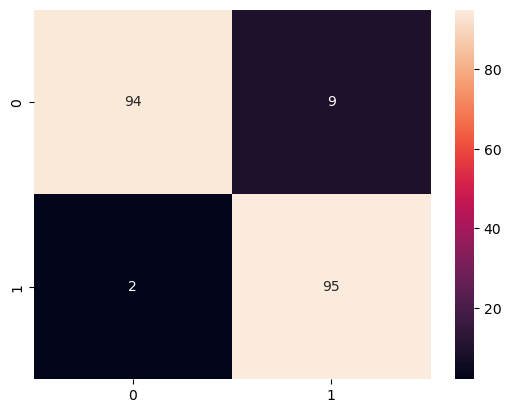

In [71]:
sns.heatmap(confusion_matrix(y_test,predict_y),annot=True)
plt.show()

In [65]:
classification_report(y_test,predict_y)

'              precision    recall  f1-score   support\n\n           0       0.98      0.91      0.94       103\n           1       0.91      0.98      0.95        97\n\n    accuracy                           0.94       200\n   macro avg       0.95      0.95      0.94       200\nweighted avg       0.95      0.94      0.94       200\n'

## model with k=17

In [66]:
clf_model1=KNeighborsClassifier(n_neighbors=17)
clf_model1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [72]:
predict_y1=clf_model1.predict(x_test)

In [73]:
accuracy_score(y_test,predict_y1)

0.955

In [74]:
confusion_matrix(y_test,predict_y1)

array([[96,  7],
       [ 2, 95]], dtype=int64)

<Axes: >

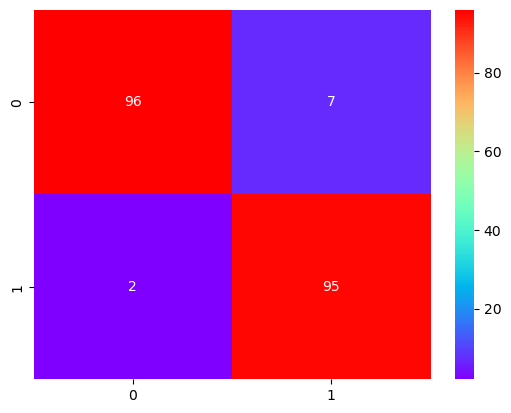

In [77]:
sns.heatmap(confusion_matrix(y_test,predict_y1),annot=True,cmap='rainbow')
plt.show

## model with k=19

In [78]:
clf_model2=KNeighborsClassifier(n_neighbors=19)
clf_model2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=19)

In [79]:
predict_y2=clf_model2.predict(x_test)

In [80]:
accuracy_score(y_test,predict_y2)

0.965

In [81]:
confusion_matrix(y_test,predict_y2)

array([[97,  6],
       [ 1, 96]], dtype=int64)

<Axes: >

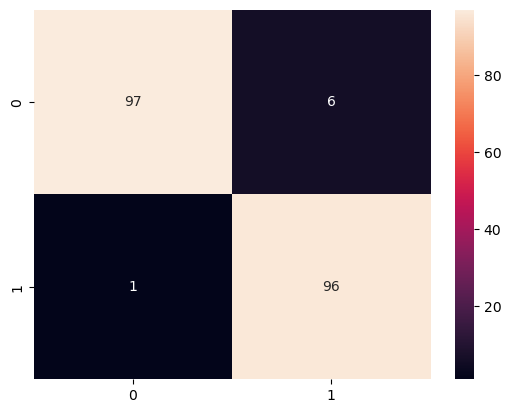

In [82]:
sns.heatmap(confusion_matrix(y_test,predict_y2),annot=True)

# So accuracy score of k=19 is 96.5% which is better than k=17 and k=31.

## load and save model

In [84]:
import joblib

In [85]:
filename='KNN Classifier model - Pr2.sav'
joblib.dump(clf_model2,filename)

['KNN Classifier model - Pr2.sav']